In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
obesity_dataset = pd.read_csv('Data/obesity.csv')

source: https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction/data
### columns:
*    Gender: Gender
*    Age: Age
*    Height : in metres
*    Weight : in kgs
*    family_history : Has a family member suffered or suffers from overweight?
*    FAVC : Do you eat high caloric food frequently?
*    FCVC : Do you usually eat vegetables in your meals?
*    NCP : How many main meals do you have daily?
*    CAEC : Do you eat any food between meals?
*    SMOKE : Do you smoke?
*    CH2O : How much water do you drink daily?
*    SCC : Do you monitor the calories you eat daily?
*    FAF: How often do you have physical activity?
*    TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
*    CALC : How often do you drink alcohol?
*    MTRANS : Which transportation do you usually use?
*    Obesity_level (Target Column) : Obesity level

# Data Analysis


In [3]:
duplicates = obesity_dataset[obesity_dataset.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 24


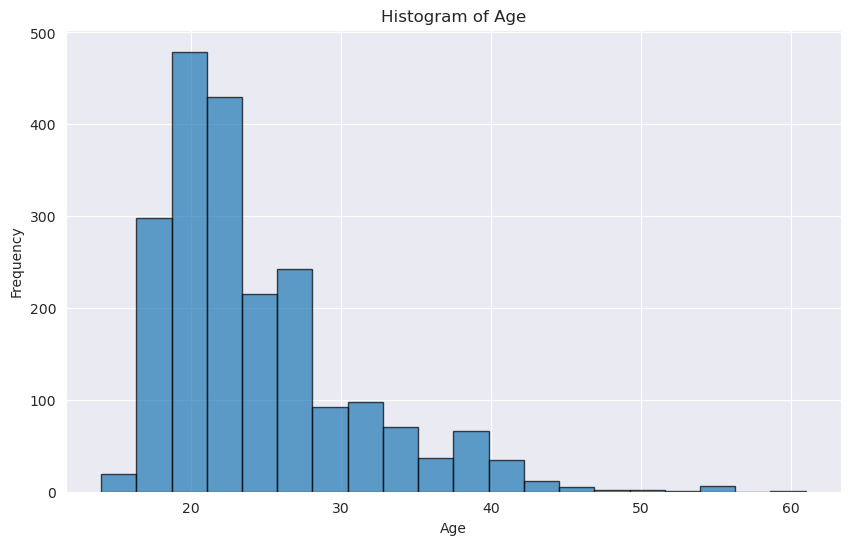

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(obesity_dataset['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

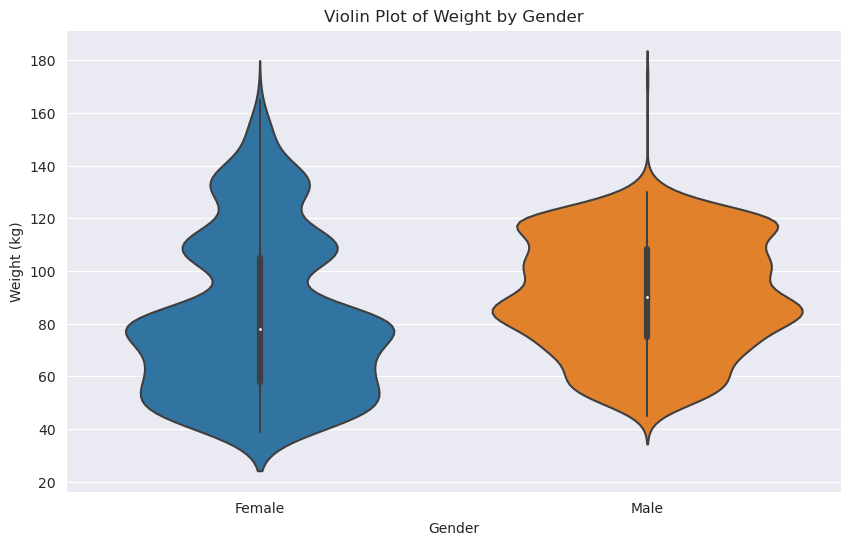

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Weight', data=obesity_dataset)
plt.title('Violin Plot of Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()

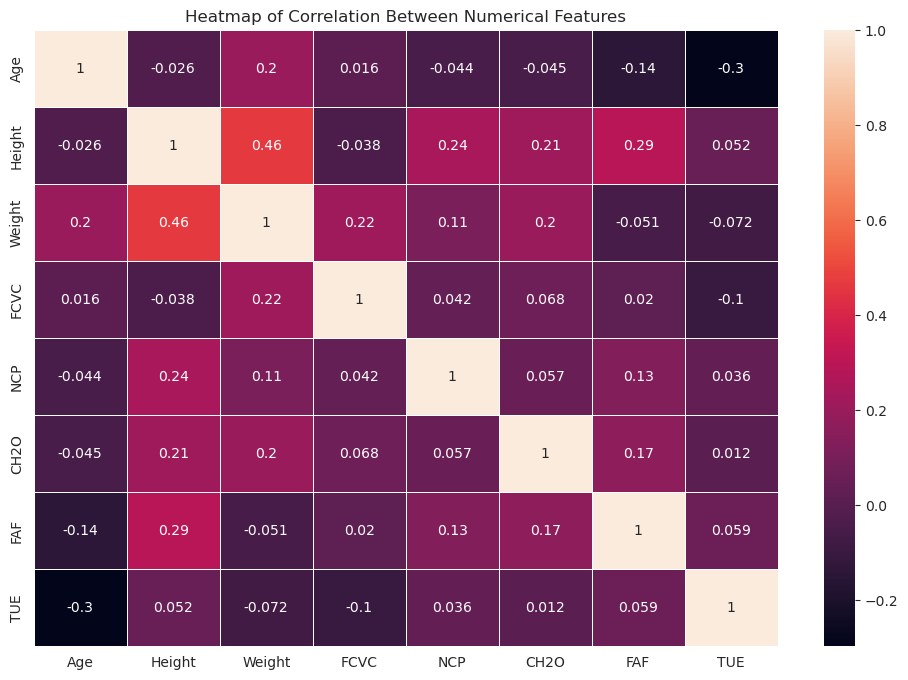

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = obesity_dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()

# Data Preprocessing

In [7]:
obesity_dataset = obesity_dataset.drop_duplicates()

duplicates = obesity_dataset[obesity_dataset.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 0


In [8]:
obesity_dataset = obesity_dataset.drop(columns=['Height', 'Weight'])

In [9]:
label_enc = LabelEncoder()
obesity_dataset['Obesity'] = label_enc.fit_transform(obesity_dataset['Obesity'])
categorical_features = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
obesity_categorized = pd.get_dummies(obesity_dataset, columns=categorical_features, drop_first=True)

# Logistic Regression

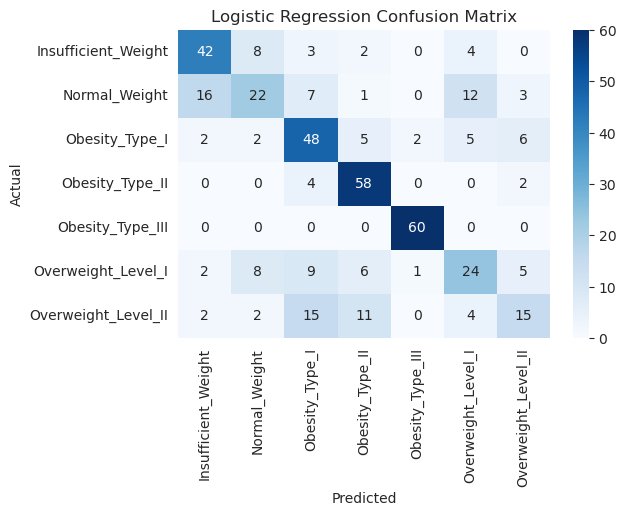

In [10]:
# split data
X = obesity_categorized.drop('Obesity', axis=1)
y = obesity_categorized['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# predict
y_pred_lr = log_reg.predict(X_test)

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Decision Tree

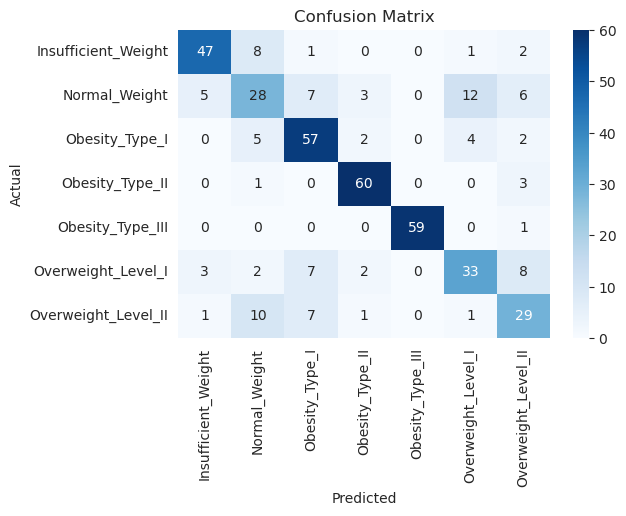

In [11]:
# split data
X = obesity_categorized.drop('Obesity', axis=1)
y = obesity_categorized['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

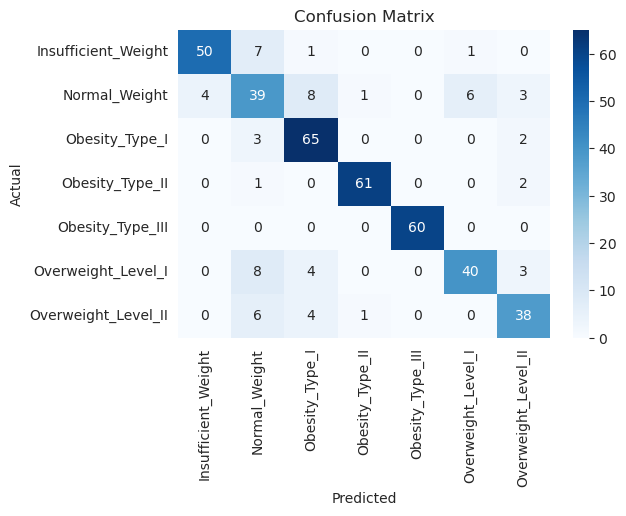

In [12]:
# split data
X = obesity_categorized.drop('Obesity', axis=1)
y = obesity_categorized['Obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# predict
y_pred_rf = clf.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()